In [1]:
#!pip install pandas
import pickle as pkl
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
##%% 
import getpass
import sys
import pickle
import xarray as xr

In [2]:
user=getpass.getuser()
print(user)
if user=='eghbalhosseini':
    analysis_dir='/Users/eghbalhosseini/MyData/snl_2020/analysis/'
    result_dir='/Users/eghbalhosseini/MyData/snl_2020'
elif user=='ehoseini':
    analysis_dir='/om/weka/evlab/ehoseini/MyData/snl_2020/analysis/'
    result_dir='/om/weka/evlab/ehoseini/MyData/snl_2020'


ehoseini


In [6]:
# create a table for model perplexity 
model_perplexity=[dict(name='nyu-mll_roberta-base-1B-1',perplexity=3.93),
                 dict(name='nyu-mll_roberta-base-1B-2',perplexity=4.25),
                 dict(name='nyu-mll_roberta-base-1B-3',perplexity=3.84),
                 dict(name='nyu-mll_roberta-base-100M-1',perplexity=4.99),
                 dict(name='nyu-mll_roberta-base-100M-2',perplexity=4.61),
                 dict(name='nyu-mll_roberta-base-100M-3',perplexity=5.02),
                 dict(name='nyu-mll_roberta-base-10M-1',perplexity=11.31),
                 dict(name='nyu-mll_roberta-base-10M-2',perplexity=10.78),
                 dict(name='nyu-mll_roberta-base-10M-3',perplexity=11.58)]

In [3]:
model1B='nyu-mll_roberta-base-1B-1'
model100M='nyu-mll_roberta-base-100M-1'
model10M='nyu-mll_roberta-base-10M-1'
model_un='roberta-base-untrained'
base='roberta-base'
benchmark='Pereira2018-encoding'
m1b_file='benchmark='+benchmark+',model='+model1B+',subsample=None.pkl'
m100m_file='benchmark='+benchmark+',model='+model100M+',subsample=None.pkl'
m10m_file='benchmark='+benchmark+',model='+model10M+',subsample=None.pkl'
mun_file='benchmark='+benchmark+',model='+model_un+',subsample=None.pkl'
base_file='benchmark='+benchmark+',model='+base+',subsample=None.pkl'
res_m1b=pd.read_pickle(os.path.join(result_dir,m1b_file))['data']
print('load 1b')
res_m100m=pd.read_pickle(os.path.join(result_dir,m100m_file))['data']
print('load 100m')
res_m10m=pd.read_pickle(os.path.join(result_dir,m10m_file))['data']
print('load 10m')
res_mun=pd.read_pickle(os.path.join(result_dir,mun_file))['data']
print('load untrained')
res_base=pd.read_pickle(os.path.join(result_dir,base_file))['data']
print('load trained')




load 1b
load 100m
load 10m
load untrained
load trained


## Figure 1. 

load 1b
load 100m
load 10m
load untrained
load trained
load 1b
load 100m
load 10m
load untrained
load trained
load 1b
load 100m
load 10m
load untrained
load trained


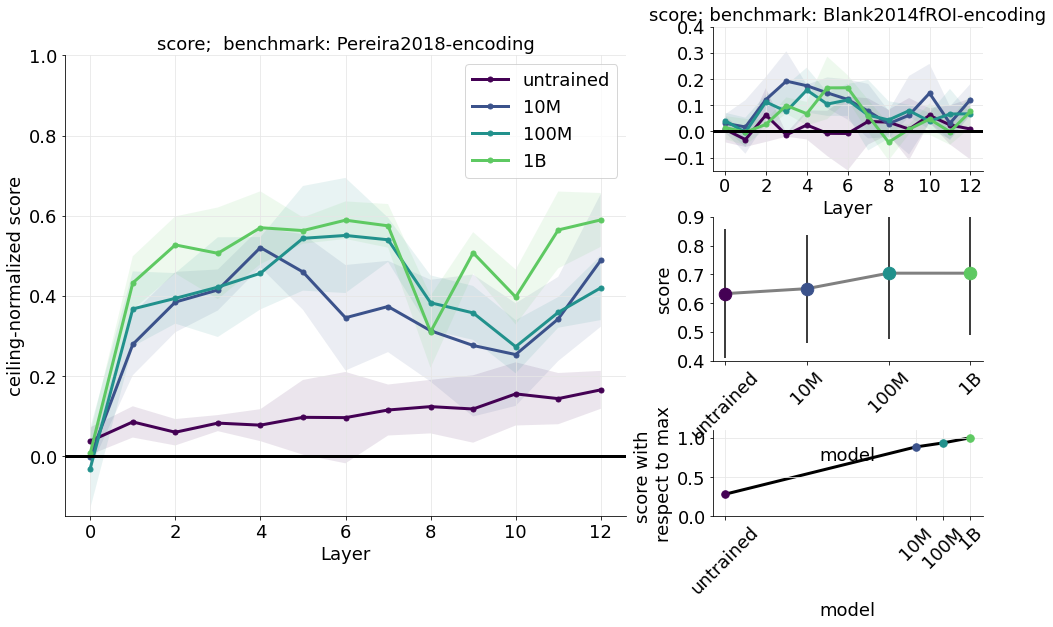

In [4]:
model1B='nyu-mll_roberta-base-1B-1'
model100M='nyu-mll_roberta-base-100M-1'
model10M='nyu-mll_roberta-base-10M-1'
model_un='roberta-base-untrained'
base='roberta-base'
benchmark='Pereira2018-encoding'
m1b_file='benchmark='+benchmark+',model='+model1B+',subsample=None.pkl'
m100m_file='benchmark='+benchmark+',model='+model100M+',subsample=None.pkl'
m10m_file='benchmark='+benchmark+',model='+model10M+',subsample=None.pkl'
mun_file='benchmark='+benchmark+',model='+model_un+',subsample=None.pkl'
base_file='benchmark='+benchmark+',model='+base+',subsample=None.pkl'
res_m1b=pd.read_pickle(os.path.join(result_dir,m1b_file))['data']
print('load 1b')
res_m100m=pd.read_pickle(os.path.join(result_dir,m100m_file))['data']
print('load 100m')
res_m10m=pd.read_pickle(os.path.join(result_dir,m10m_file))['data']
print('load 10m')
res_mun=pd.read_pickle(os.path.join(result_dir,mun_file))['data']
print('load untrained')
res_base=pd.read_pickle(os.path.join(result_dir,base_file))['data']
print('load trained')

fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.05,.05,.52,.8])
#plt.scatter(gammas,np.stack(D_s_DV_trade),s=10,c=[0,0,0])
cmap_all=cm.get_cmap('viridis')
all_col=cmap_all(np.divide(np.arange(4),4))
x_val=res_base.coords['layer'].values;
r3 = np.arange(len(x_val))

y=res_mun.values[:,0]
yerr=res_mun.values[:,1]
ax.plot(r3,y,linewidth=3,color=all_col[0,:],label='untrained',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[0,:],alpha=0.1)

y=res_m10m.values[:,0]
yerr=res_m10m.values[:,1]
ax.plot(r3,y,linewidth=3,color=all_col[1,:],label='10M',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[1,:],alpha=0.1)

y=res_m100m.values[:,0]
yerr=res_m100m.values[:,1]
ax.plot(r3,y,linewidth=3,color=all_col[2,:],label='100M',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[2,:],alpha=0.1)

y=res_m1b.values[:,0]
yerr=res_m1b.values[:,1]
ax.plot(r3,y,linewidth=3,color=all_col[3,:],label='1B',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[3,:],alpha=0.1)
ax.set_xlabel('Layer')
ax.axhline(y=0,xmin=0,xmax=res_mun.values.shape[0],color='k',linewidth=3)  
#plt.xticks(r3,x_val,rotation=45)
ax.set_ylabel(res_mun.attrs['description'])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
benchmark='Pereira2018-encoding'
ax.set_title('score;  benchmark: '+ benchmark )
leg=ax.legend(prop={'size': 18})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(18)
ax.set_ylim([-.15,1])
plt.grid(True, which="both",ls="-", color='0.9')

###########################################
# plot max prediction for each step  
y=np.asarray([res_mun.values[:,0].max(),res_m10m.values[:,0].max(),res_m100m.values[:,0].max(),res_m1b.values[:,0].max()])
y=y/y.max()
x=np.asarray([1,1e7,1e8,1e9])/1e9
x_val=['untrained','10M','100M','1B']
ax = fig.add_axes([.65,.05,.25,.15])
for idx, p in enumerate(x):
    ax.plot(x[idx],y[idx],color=all_col[idx,:],marker='.',markersize=15)
ax.semilogx(x,y,linewidth=3,color='k',zorder=0)
ax.set_ylabel('score with \nrespect to max')
ax.set_xlabel('model')

plt.xscale('log')
plt.xticks(x,x_val,rotation=45)
ax.set_ylim([-0,1.1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.grid(True, which="both",ls="-", color='0.9')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(18)
# 
###########################################################
base='roberta-base'
benchmark='Futrell2018-encoding'
m1b_file='benchmark='+benchmark+',model='+model1B+',subsample=None.pkl'
m100m_file='benchmark='+benchmark+',model='+model100M+',subsample=None.pkl'
m10m_file='benchmark='+benchmark+',model='+model10M+',subsample=None.pkl'
mun_file='benchmark='+benchmark+',model='+model_un+',subsample=None.pkl'
base_file='benchmark='+benchmark+',model='+base+',subsample=None.pkl'
res_m1b=pd.read_pickle(os.path.join(result_dir,m1b_file))['data']
print('load 1b')
res_m100m=pd.read_pickle(os.path.join(result_dir,m100m_file))['data']
print('load 100m')
res_m10m=pd.read_pickle(os.path.join(result_dir,m10m_file))['data']
print('load 10m')
res_mun=pd.read_pickle(os.path.join(result_dir,mun_file))['data']
print('load untrained')
res_base=pd.read_pickle(os.path.join(result_dir,base_file))['data']
print('load trained')
    
x=np.asarray([2,4,6,8])
x_val=['untrained','10M','100M','1B']

y=[res_mun.values[0,0],res_m10m.values[0,0],res_m100m.values[0,0],res_m1b.values[0,0]]
yerr=[res_mun.values[0,1],res_m10m.values[0,1],res_m100m.values[0,1],res_m1b.values[0,1]]
ax = fig.add_axes([.65,.32,.25,.25])
for idx, p in enumerate(x):
    #ax.plot(x[idx],y[idx],width=1.5,color=all_col[idx,:])
    ax.errorbar(x[idx],y[idx],yerr[idx],color=(0,0,0))
    ax.plot(x[idx],y[idx],color=all_col[idx,:],marker='.',markersize=25,label=x_val[idx])
ax.plot(x,y,linewidth=3,color=(.5,.5,.5),zorder=1)
ax.set_ylabel('score')
ax.set_xlabel('model')
plt.xticks(x,x_val,rotation=45)
ax.set_ylim([.4,.9])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#plt.grid(False, which="both",ls="-", color='0.9')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(18)

    
######################################################################## 
ax = fig.add_axes([.65,.65,.25,.25])
benchmark='Blank2014fROI-encoding'
m1b_file='benchmark='+benchmark+',model='+model1B+',subsample=None.pkl'
m100m_file='benchmark='+benchmark+',model='+model100M+',subsample=None.pkl'
m10m_file='benchmark='+benchmark+',model='+model10M+',subsample=None.pkl'
mun_file='benchmark='+benchmark+',model='+model_un+',subsample=None.pkl'
base_file='benchmark='+benchmark+',model='+base+',subsample=None.pkl'
res_m1b=pd.read_pickle(os.path.join(result_dir,m1b_file))['data']
print('load 1b')
res_m100m=pd.read_pickle(os.path.join(result_dir,m100m_file))['data']
print('load 100m')
res_m10m=pd.read_pickle(os.path.join(result_dir,m10m_file))['data']
print('load 10m')
res_mun=pd.read_pickle(os.path.join(result_dir,mun_file))['data']
print('load untrained')
res_base=pd.read_pickle(os.path.join(result_dir,base_file))['data']
print('load trained')



y=res_mun.values[:,0]
yerr=res_mun.values[:,1]
ax.plot(r3,y,linewidth=3,color=all_col[0,:],label='untrained',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[0,:],alpha=0.1)

y=res_m10m.values[:,0]
yerr=res_m10m.values[:,1]
ax.plot(r3,y,linewidth=3,color=all_col[1,:],label='10M',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[1,:],alpha=0.1)

y=res_m100m.values[:,0]
yerr=res_m100m.values[:,1]
ax.plot(r3,y,linewidth=3,color=all_col[2,:],label='100M',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[2,:],alpha=0.1)

y=res_m1b.values[:,0]
yerr=res_m1b.values[:,1]
ax.plot(r3,y,linewidth=3,color=all_col[3,:],label='1B',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[3,:],alpha=0.1)

ax.set_xlabel('Layer')
ax.axhline(y=0,xmin=0,xmax=res_mun.values.shape[0],color='k',linewidth=3)  
#plt.xticks(r3,x_val,rotation=45)
#ax.set_ylabel(res_mun.attrs['description'])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('score; benchmark: '+ res_base.attrs['benchmark'])
#leg=ax.legend(prop={'size': 12})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(18)
ax.set_ylim([-.15,.4])
plt.grid(True, which="both",ls="-", color='0.9')

fig.savefig(os.path.join(analysis_dir,res_base.attrs['model']+'_'+'_Fig1_effect_of_training.pdf'))
fig.savefig(os.path.join(analysis_dir,res_base.attrs['model']+'_'+'_Fig1_effect_of_training.pdf'))

# Figure 2 

In [14]:
model1B='nyu-mll_roberta-base-1B'
model100M='nyu-mll_roberta-base-100M'
model10M='nyu-mll_roberta-base-10M'
model_un='roberta-base-untrained'
base='roberta-base'
benchmark='Pereira2018-encoding'
mun_file='benchmark='+benchmark+',model='+model_un+',subsample=None.pkl'
base_file='benchmark='+benchmark+',model='+base+',subsample=None.pkl'
models=[model10M,model100M,model1B]
models_perf=[]
for model in models:
    model_perf=[]
    for i in range(3):
        print('benchmark='+benchmark+',model='+model+'-'+str(i+1)+',subsample=None.pkl')
        model_file='benchmark='+benchmark+',model='+model+'-'+str(i+1)+',subsample=None.pkl';
        res_=pd.read_pickle(os.path.join(result_dir,model_file))
        res_=res_['data']
        model_perf.append(res_.values)
        
    models_perf.append(model_perf)
res_mun=pd.read_pickle(os.path.join(result_dir,mun_file))['data']
print('load untrained')
res_base=pd.read_pickle(os.path.join(result_dir,base_file))['data']
print('load trained')



benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-3,subsample=None.pkl
load untrained
load trained


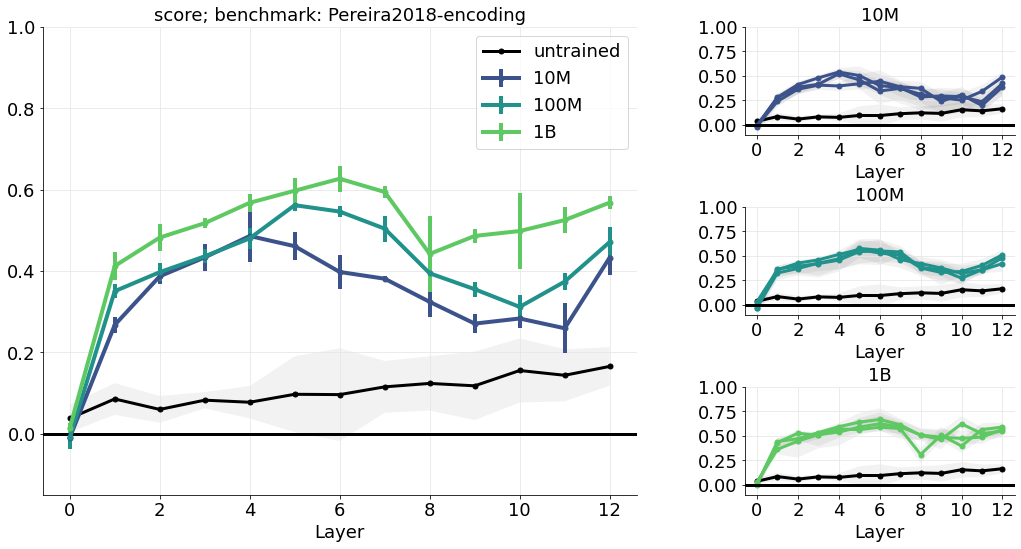

In [15]:
fig = plt.figure(figsize=[15,10])
ax = fig.add_axes([.05,.1,.55,.65])
#plt.scatter(gammas,np.stack(D_s_DV_trade),s=10,c=[0,0,0])
cmap_all=cm.get_cmap('viridis')
all_col=cmap_all(np.divide(np.arange(4),4))
x_val=res_base.coords['layer'].values;
r3 = np.arange(len(x_val))

y=res_mun.values[:,0]
yerr=res_mun.values[:,1]
ax.plot(r3,y,linewidth=3,color='k',label='untrained',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor='k',alpha=0.05)

x=np.stack([x[:,0] for x in models_perf[0]])
ax.errorbar(r3,x.mean(axis=0),yerr=x.std(axis=0),linewidth=idx+2,color=all_col[1,:],label='10M',marker='.',markersize=10)

x=np.stack([x[:,0] for x in models_perf[1]])
ax.errorbar(r3,x.mean(axis=0),yerr=x.std(axis=0),linewidth=idx+2,color=all_col[2,:],label='100M',marker='.',markersize=10)

x=np.stack([x[:,0] for x in models_perf[2]])
ax.errorbar(r3,x.mean(axis=0),yerr=x.std(axis=0),linewidth=idx+2,color=all_col[3,:],label='1B',marker='.',markersize=10)

ax.set_xlabel('Layer')
ax.axhline(y=0,xmin=0,xmax=res_mun.values.shape[0],color='k',linewidth=3)  
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('score; benchmark: '+ res_base.attrs['benchmark'])
leg=ax.legend(prop={'size': 18})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(14)
ax.set_ylim([-.15,1])
plt.grid(True, which="both",ls="-", color='0.9')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(18)


ax = fig.add_axes([.7,.6,.25,.15])
y=res_mun.values[:,0]
yerr=res_mun.values[:,1]
ax.plot(r3,y,linewidth=3,color='k',label='untrained',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor='k',alpha=0.05)


Y=([x[:,0] for x in models_perf[0]])
Yerr=[x[:,1] for x in models_perf[0]]
for idx, y in enumerate(Y):
    ax.plot(r3,y,linewidth=3,color=all_col[1,:],marker='.',markersize=10)
    ax.fill_between(r3,y-Yerr[idx],y+yerr,facecolor='k',alpha=0.05)

ax.set_xlabel('Layer')
ax.axhline(y=0,xmin=0,xmax=res_mun.values.shape[0],color='k',linewidth=3)  
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('10M')
#leg=ax.legend(prop={'size': 18})

ax.set_ylim([-.1,1])
plt.grid(True, which="both",ls="-", color='0.9')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(18)
    
    
    
ax = fig.add_axes([.7,.35,.25,.15])
y=res_mun.values[:,0]
yerr=res_mun.values[:,1]
ax.plot(r3,y,linewidth=3,color='k',label='untrained',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor='k',alpha=0.05)


Y=([x[:,0] for x in models_perf[1]])
Yerr=[x[:,1] for x in models_perf[1]]
for idx, y in enumerate(Y):
    ax.plot(r3,y,linewidth=3,color=all_col[2,:],marker='.',markersize=10)
    ax.fill_between(r3,y-Yerr[idx],y+yerr,facecolor='k',alpha=0.05)

ax.set_xlabel('Layer')
ax.axhline(y=0,xmin=0,xmax=res_mun.values.shape[0],color='k',linewidth=3)  
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('100M')
#leg=ax.legend(prop={'size': 18})

ax.set_ylim([-.1,1])
plt.grid(True, which="both",ls="-", color='0.9')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(18)

    
ax = fig.add_axes([.7,.1,.25,.15])
y=res_mun.values[:,0]
yerr=res_mun.values[:,1]
ax.plot(r3,y,linewidth=3,color='k',label='untrained',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor='k',alpha=0.05)


Y=([x[:,0] for x in models_perf[2]])
Yerr=[x[:,1] for x in models_perf[2]]
for idx, y in enumerate(Y):
    ax.plot(r3,y,linewidth=3,color=all_col[3,:],marker='.',markersize=10)
    ax.fill_between(r3,y-Yerr[idx],y+yerr,facecolor='k',alpha=0.05)

ax.set_xlabel('Layer')
ax.axhline(y=0,xmin=0,xmax=res_mun.values.shape[0],color='k',linewidth=3)  
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('1B')
#leg=ax.legend(prop={'size': 18})

ax.set_ylim([-.1,1])
plt.grid(True, which="both",ls="-", color='0.9')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(18)


fig.savefig(os.path.join(analysis_dir,res_base.attrs['model']+'_Fig2_performance_of_all_models.png'))
fig.savefig(os.path.join(analysis_dir,res_base.attrs['model']+'_Fig2_performance_of_all_models.pdf'))

In [65]:
y=([x[:,0] for x in models_perf[0]])

[array([-0.00126258,  0.27892739,  0.38462319,  0.4148165 ,  0.52072838,
         0.45974309,  0.34546796,  0.37355449,  0.31312606,  0.27625552,
         0.25358278,  0.34255067,  0.48875068]),
 array([-0.02024507,  0.28210978,  0.41194491,  0.47975481,  0.53959872,
         0.50354528,  0.40182004,  0.38016361,  0.28560976,  0.29587601,
         0.28883253,  0.23640191,  0.42275924]),
 array([-0.00811486,  0.2408954 ,  0.36400492,  0.40566507,  0.39759267,
         0.41948304,  0.44544493,  0.38923312,  0.37342208,  0.23997283,
         0.30724859,  0.19862996,  0.38760733])]

# Figure 3. 

In [9]:
model1B='nyu-mll_roberta-base-1B'
model100M='nyu-mll_roberta-base-100M'
model10M='nyu-mll_roberta-base-10M'
model_un='roberta-base-untrained'
benchmark='Pereira2018-encoding'
models=[model10M,model100M,model1B]
models_perf=[]
models_perp=[]
for model in models:
    model_perf=[]
    model_perp=[]
    for i in range(3):
        print('benchmark='+benchmark+',model='+model+'-'+str(i+1)+',subsample=None.pkl')
        model_file='benchmark='+benchmark+',model='+model+'-'+str(i+1)+',subsample=None.pkl';
        res_=pd.read_pickle(os.path.join(result_dir,model_file))
        res_=res_['data']
        model_perf.append(res_.values[:,0].max())
        model_perp.append([x['perplexity'] for x in model_perplexity if model+'-'+str(i+1) == x['name']])
    models_perf.append(model_perf)
    models_perp.append(model_perp)


benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-3,subsample=None.pkl


benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-3,subsample=None.pkl
benchmark=Futrell2018-encoding,model=nyu-mll_roberta-base-10M-1,subsample=None.pkl
benchmark=Futrell2018-encoding,model=nyu-mll_roberta-base-10M-2,subsample=None.pkl
benchmark=Futrell2018-encoding,model=nyu-mll_roberta-base-10M-3,subsample=None.pkl
benc

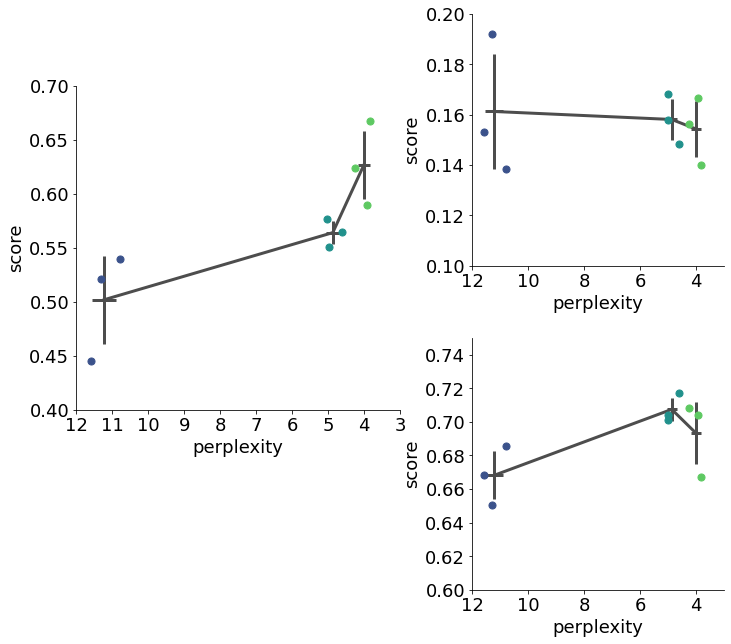

In [12]:
model1B='nyu-mll_roberta-base-1B'
model100M='nyu-mll_roberta-base-100M'
model10M='nyu-mll_roberta-base-10M'
model_un='roberta-base-untrained'
benchmark='Pereira2018-encoding'
models=[model10M,model100M,model1B]
models_perf=[]
models_perp=[]
for model in models:
    model_perf=[]
    model_perp=[]
    for i in range(3):
        print('benchmark='+benchmark+',model='+model+'-'+str(i+1)+',subsample=None.pkl')
        model_file='benchmark='+benchmark+',model='+model+'-'+str(i+1)+',subsample=None.pkl';
        res_=pd.read_pickle(os.path.join(result_dir,model_file))
        res_=res_['data']
        model_perf.append(res_.values[:,0].max())
        model_perp.append([x['perplexity'] for x in model_perplexity if model+'-'+str(i+1) == x['name']])
    models_perf.append(model_perf)
    models_perp.append(model_perp)

fig = plt.figure(figsize=[10,10])
ax = fig.add_axes([.05,.4,.45,.45])
#plt.scatter(gammas,np.stack(D_s_DV_trade),s=10,c=[0,0,0])
cmap_all=cm.get_cmap('viridis')
all_col=cmap_all(np.divide(np.arange(4),4))

for k in range(3):
    ax.scatter(np.stack(models_perp[k]),np.stack(models_perf[k]),color=all_col[k+1,:],s=50)
ax.errorbar(np.mean(np.asarray(models_perp),axis=1),np.mean(np.asarray(models_perf),axis=1),xerr=np.std(np.asarray(models_perp),axis=1).flatten(),
            yerr=np.std(np.asarray(models_perf),axis=1).flatten(),linewidth=3,color=(.3,.3,.3),zorder=0)

ax.set_xlabel('perplexity')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
benchmark='Pereira2018-encoding'
ax.set_ylabel('score')
#ax.set_title(benchmark)
ax.set_xlim(12, 3)
ax.set_ylim(.4, .7)
benchmark='Futrell2018-encoding'
models_perf=[]
models_perp=[]
for model in models:
    model_perf=[]
    model_perp=[]
    for i in range(3):
        print('benchmark='+benchmark+',model='+model+'-'+str(i+1)+',subsample=None.pkl')
        model_file='benchmark='+benchmark+',model='+model+'-'+str(i+1)+',subsample=None.pkl';
        res_=pd.read_pickle(os.path.join(result_dir,model_file))
        res_=res_['data']
        model_perf.append(res_.values[:,0].max())
        model_perp.append([x['perplexity'] for x in model_perplexity if model+'-'+str(i+1) == x['name']])
    models_perf.append(model_perf)
    models_perp.append(model_perp)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(18)

ax = fig.add_axes([.6,.15,.35,.35])
for k in range(3):
    ax.scatter(np.stack(models_perp[k]),np.stack(models_perf[k]),color=all_col[k+1,:],s=50)
ax.errorbar(np.mean(np.asarray(models_perp),axis=1),np.mean(np.asarray(models_perf),axis=1),xerr=np.std(np.asarray(models_perp),axis=1).flatten(),
            yerr=np.std(np.asarray(models_perf),axis=1).flatten(),linewidth=3,color=(.3,.3,.3),zorder=0)

ax.set_xlabel('perplexity')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel('score')
#ax.set_title(benchmark)
ax.set_xlim(12, 3)
ax.set_ylim(.6, .75)
benchmark='Blank2014fROI-encoding'
models_perf=[]
models_perp=[]
for model in models:
    model_perf=[]
    model_perp=[]
    for i in range(3):
        print('benchmark='+benchmark+',model='+model+'-'+str(i+1)+',subsample=None.pkl')
        model_file='benchmark='+benchmark+',model='+model+'-'+str(i+1)+',subsample=None.pkl';
        res_=pd.read_pickle(os.path.join(result_dir,model_file))
        res_=res_['data']
        model_perf.append(res_.values[:,0].max())
        model_perp.append([x['perplexity'] for x in model_perplexity if model+'-'+str(i+1) == x['name']])
    models_perf.append(model_perf)
    models_perp.append(model_perp)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(18)

ax = fig.add_axes([.6,.6,.35,.35])
for k in range(3):
    ax.scatter(np.stack(models_perp[k]),np.stack(models_perf[k]),color=all_col[k+1,:],s=50)
ax.errorbar(np.mean(np.asarray(models_perp),axis=1),np.mean(np.asarray(models_perf),axis=1),xerr=np.std(np.asarray(models_perp),axis=1).flatten(),
            yerr=np.std(np.asarray(models_perf),axis=1).flatten(),linewidth=3,color=(.3,.3,.3),zorder=0)

ax.set_xlabel('perplexity')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel('score')
#ax.set_title(benchmark)
ax.set_ylim(.1, .2)
ax.set_xlim(12, 3)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(18)
fig.savefig(os.path.join(analysis_dir,res_base.attrs['model']+'_Fig3_performance_vs_perplexity.png'))
fig.savefig(os.path.join(analysis_dir,res_base.attrs['model']+'_Fig3_performance_vs_perplexity.pdf'))

(3, 1)

# Figure 4 

In [35]:
model1B='nyu-mll_roberta-base-1B'
model100M='nyu-mll_roberta-base-100M'
model10M='nyu-mll_roberta-base-10M'
model_un='roberta-base-untrained'
base='roberta-base'
benchmark='Pereira2018-encoding'
#benchmark='Blank2014fROI-encoding'
mun_file='benchmark='+benchmark+',model='+model_un+',subsample=None.pkl'
base_file='benchmark='+benchmark+',model='+base+',subsample=None.pkl'
models=[model10M,model100M,model1B]
models_perf=[]
for model in models:
    model_perf=[]
    for i in range(3):
        print('benchmark='+benchmark+',model='+model+'-'+str(i+1)+',subsample=None.pkl')
        model_file='benchmark='+benchmark+',model='+model+'-'+str(i+1)+',subsample=None.pkl';
        res_=pd.read_pickle(os.path.join(result_dir,model_file))
        res_=res_['data']
        model_perf.append(res_.values)
    models_perf.append(model_perf)
mun_file='benchmark='+benchmark+',model='+model_un+',subsample=None.pkl'
res_mun=pd.read_pickle(os.path.join(result_dir,mun_file))['data']



benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-3,subsample=None.pkl


In [10]:
layer_learn=[]
for k in range(3):
    temp=[x[k][:,0] for x in models_perf]
    temp.insert(0,res_mun.values[:,0])
    #y=np.diff(np.stack([res_mun.values[:,0],res_m10m.values[:,0],res_m100m.values[:,0],res_m1b.values[:,0]]).transpose(),axis=1)
    layer_learn.append(np.diff(np.stack(temp).transpose(),axis=1))
    

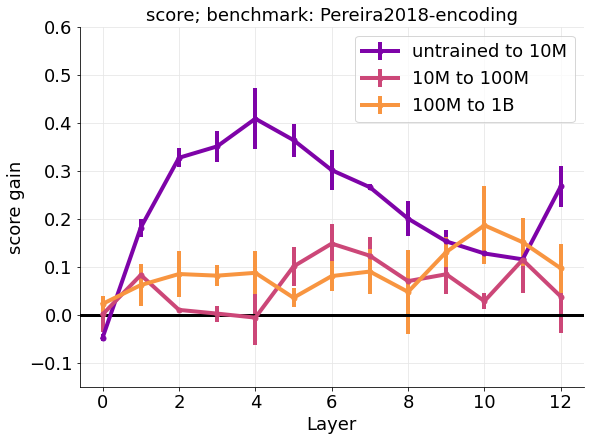

In [11]:
cmap_all=cm.get_cmap('plasma')
all_col=cmap_all(np.divide(np.arange(4),4))
y=res_mun.values[:,0]
fig = plt.figure(figsize=[10,10])
ax = fig.add_axes([.1,.05,.7,.5])
x_val=res_mun.coords['layer'].values;
r3 = np.arange(len(x_val))
x=np.stack([x[:,0] for x in layer_learn])
ax.errorbar(r3,x.mean(axis=0),yerr=x.std(axis=0),linewidth=4,color=all_col[1,:],label='untrained to 10M',marker='.',markersize=10)

x=np.stack([x[:,1] for x in layer_learn])
ax.errorbar(r3,x.mean(axis=0),yerr=x.std(axis=0),linewidth=4,color=all_col[2,:],label='10M to 100M',marker='.',markersize=10)

x=np.stack([x[:,2] for x in layer_learn])
ax.errorbar(r3,x.mean(axis=0),yerr=x.std(axis=0),linewidth=4,color=all_col[3,:],label='100M to 1B',marker='.',markersize=10)
ax.set_xlabel('Layer')
ax.set_ylabel('score gain')
ax.axhline(y=0,xmin=0,xmax=y.shape[0],color='k',linewidth=3)  
plt.grid(True, which="both",ls="-", color='0.9')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#leg=ax.legend(prop={'size': 10},bbox_to_anchor=(1., 1.05))
ax.set_title('score; benchmark: '+ benchmark)
leg=ax.legend(prop={'size': 18})

ax.set_ylim([-.15,.6])
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(18)

fig.savefig(os.path.join(analysis_dir,res_mun.attrs['model']+'_'+benchmark+'_Fig4_learning_dynamics.png'))
fig.savefig(os.path.join(analysis_dir,res_mun.attrs['model']+benchmark+'_Fig4_learning_dynamics.pdf'))

In [12]:
os.path.join(analysis_dir,res_mun.attrs['model']+'_'+benchmark+'_Fig4_learning_dynamics.png')

'/om/weka/evlab/ehoseini/MyData/snl_2020/analysis/roberta-base-untrained_Pereira2018-encoding_Fig4_learning_dynamics.png'

In [46]:
[[(y[:,0].max(), y[:,0].argmax() )for y in x] for x in models_perf]

[[(0.5207283794221541, 4), (0.5395987229999921, 4), (0.4454449328804467, 6)],
 [(0.5508640083172631, 6), (0.5650260902566157, 5), (0.5762457200910946, 5)],
 [(0.5896466956716938, 12), (0.6238991793961705, 6), (0.6670902183333505, 6)]]

NameError: name 'layer_learn' is not defined

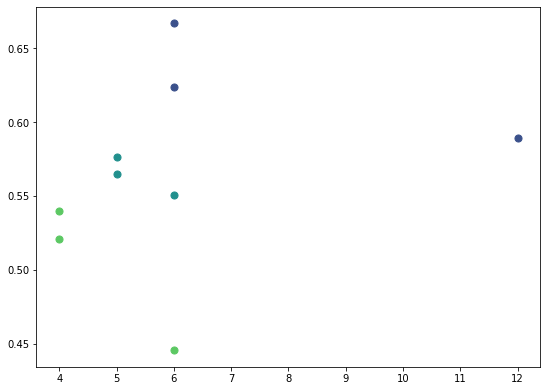

In [59]:
cmap_all=cm.get_cmap('viridis_r')
all_col=cmap_all(np.divide(np.arange(4),4))
y=res_mun.values[:,0]
fig = plt.figure(figsize=[10,10])
ax = fig.add_axes([.1,.05,.7,.5])
x_val=res_mun.coords['layer'].values;
r3 = np.arange(len(x_val))

layer_perf=[[[y[:,0].argmax(), y[:,0].max()] for y in x] for x in models_perf]

for idx, x in enumerate(layer_perf):

    ax.scatter(np.asarray(x)[:,0],np.asarray(x)[:,1],color=all_col[idx+1,:],s=50)

x=np.stack([x[:,2] for x in layer_learn])
ax.errorbar(r3,x.mean(axis=0),yerr=x.std(axis=0),linewidth=4,color=all_col[3,:],label='100M to 1B',marker='.',markersize=10)
ax.set_xlabel('Layer')
ax.set_ylabel('score gain')
ax.axhline(y=0,xmin=0,xmax=y.shape[0],color='k',linewidth=3)  
plt.grid(True, which="both",ls="-", color='0.9')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#leg=ax.legend(prop={'size': 10},bbox_to_anchor=(1., 1.05))
ax.set_title('score; benchmark: '+ benchmark)
leg=ax.legend(prop={'size': 18})

ax.set_ylim([-.15,.6])
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(18)

fig.savefig(os.path.join(analysis_dir,res_mun.attrs['model']+'_'+benchmark+'_Fig4_learning_dynamics.png'))
fig.savefig(os.path.join(analysis_dir,res_mun.attrs['model']+benchmark+'_Fig4_learning_dynamics.pdf'))

In [58]:
np.asarray(x)[:,1]

array([0.5896467 , 0.62389918, 0.66709022])